In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import sqlite3

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
#store the database path
database_path = "../Resources/hawaii.sqlite"

In [5]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///{database_path}")
Base = automap_base()

In [6]:
# reflect an existing database into a new model
Base.prepare(autoload_with=engine)
# reflect the tables


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
#debug statement to check if measurement is working properly
for row in session.query(Measurement, Measurement.date).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.measurement object at 0x000001F610EB1A60>, '2010-01-01')
(<sqlalchemy.ext.automap.measurement object at 0x000001F610EB12B0>, '2010-01-02')
(<sqlalchemy.ext.automap.measurement object at 0x000001F610EB1130>, '2010-01-03')
(<sqlalchemy.ext.automap.measurement object at 0x000001F610EB1190>, '2010-01-04')
(<sqlalchemy.ext.automap.measurement object at 0x000001F610EB1EB0>, '2010-01-06')


In [13]:
#debug statement to check if station is working properly
for row in session.query(Station, Station.name).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.station object at 0x000001F610FCC940>, 'WAIKIKI 717.2, HI US')
(<sqlalchemy.ext.automap.station object at 0x000001F610FCCA30>, 'KANEOHE 838.1, HI US')
(<sqlalchemy.ext.automap.station object at 0x000001F610FCCA90>, 'KUALOA RANCH HEADQUARTERS 886.9, HI US')
(<sqlalchemy.ext.automap.station object at 0x000001F610FCCAF0>, 'PEARL CITY, HI US')
(<sqlalchemy.ext.automap.station object at 0x000001F610FCCB50>, 'UPPER WAHIAWA 874.3, HI US')


# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.
dates_list = []

#debug statement to check if measurement is working properly
for row in session.query(Measurement.date).all():
    dates_list.append(row)

dates_list

[('2010-01-01',),
 ('2010-01-02',),
 ('2010-01-03',),
 ('2010-01-04',),
 ('2010-01-06',),
 ('2010-01-07',),
 ('2010-01-08',),
 ('2010-01-09',),
 ('2010-01-10',),
 ('2010-01-11',),
 ('2010-01-12',),
 ('2010-01-14',),
 ('2010-01-15',),
 ('2010-01-16',),
 ('2010-01-17',),
 ('2010-01-18',),
 ('2010-01-19',),
 ('2010-01-20',),
 ('2010-01-21',),
 ('2010-01-22',),
 ('2010-01-23',),
 ('2010-01-24',),
 ('2010-01-25',),
 ('2010-01-26',),
 ('2010-01-27',),
 ('2010-01-28',),
 ('2010-01-30',),
 ('2010-01-31',),
 ('2010-02-01',),
 ('2010-02-03',),
 ('2010-02-04',),
 ('2010-02-05',),
 ('2010-02-06',),
 ('2010-02-07',),
 ('2010-02-08',),
 ('2010-02-09',),
 ('2010-02-11',),
 ('2010-02-12',),
 ('2010-02-13',),
 ('2010-02-14',),
 ('2010-02-15',),
 ('2010-02-16',),
 ('2010-02-17',),
 ('2010-02-19',),
 ('2010-02-20',),
 ('2010-02-21',),
 ('2010-02-22',),
 ('2010-02-23',),
 ('2010-02-24',),
 ('2010-02-25',),
 ('2010-02-26',),
 ('2010-02-28',),
 ('2010-03-01',),
 ('2010-03-02',),
 ('2010-03-03',),
 ('2010-03

In [31]:
# Find the most recent date in the data set.
dates_df = pd.DataFrame(dates_list)
dates_df.sort_values
print(dates_df.max())

date    2017-08-23
dtype: object


In [34]:
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01',)

In [36]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

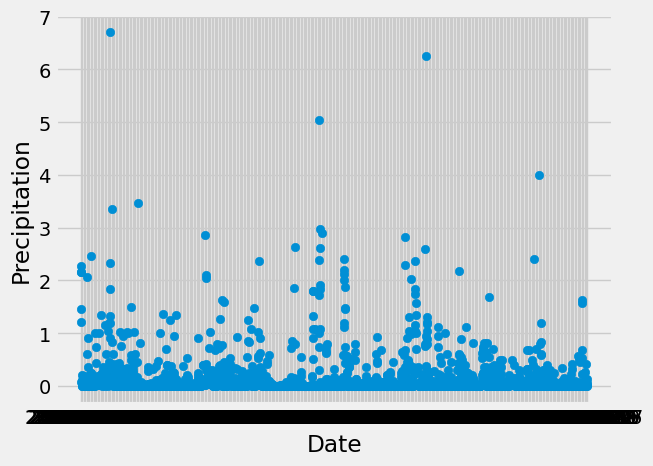

In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
cutoff_date = '2016-08-23'

# Perform a query to retrieve the data and precipitation scores
prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > cutoff_date).all()
prcp

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp)
prcp_df

# Sort the dataframe by date
prcp_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
x_values = prcp_df['date']
y_values = prcp_df['prcp']
plt.scatter(x_values, y_values)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.show()

In [56]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_mean = prcp_df['prcp'].mean()
prcp_std_dev = prcp_df['prcp'].std()
prcp_min = prcp_df['prcp'].min()
prcp_max = prcp_df['prcp'].max()
prcp_median = prcp_df['prcp'].median()


quartiles = prcp_df['prcp'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Mean Precipitation: {prcp_mean}")
print(f"Std. Dev. Precipitation: {prcp_std_dev}")
print(f"Min Precipitation: {prcp_min}")
print(f"Lower quartile of precipitation is: {lowerq}")
print(f"Median Precipitation: {prcp_median}")
print(f"Median of precipitation is: {quartiles[0.5]} (calculated a 2nd way)")
print(f"Upper quartile of precipitation is: {upperq}")
print(f"Max Precipitation: {prcp_max}")
print(f"The interquartile range of precipitation is: {iqr}")


Mean Precipitation: 0.1764615384615388
Std. Dev. Precipitation: 0.46028836368132586
Min Precipitation: 0.0
Lower quartile of precipitation is: 0.0
Median Precipitation: 0.02
Median of precipitation is: 0.02 (calculated a 2nd way)
Upper quartile of precipitation is: 0.13
Max Precipitation: 6.7
The interquartile range of precipitation is: 0.13


In [48]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df['prcp'].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()